## Mini Project III

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# TWM_CUSTOMER

In [2]:
twm_customer = pd.read_csv('twm_customer.csv',sep=';')
twm_customer.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [3]:
# missing data
total = twm_customer.isnull().sum().sort_values(ascending=False)
percent = (twm_customer.isnull().sum()/twm_customer.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
state_code,0,0.0
city_name,0,0.0
postal_code,0,0.0
street_name,0,0.0
street_nbr,0,0.0
last_name,0,0.0
first_name,0,0.0
name_prefix,0,0.0
marital_status,0,0.0
gender,0,0.0


# Some feature engineering

In [4]:
# make gender a numeric column 'is_male'
twm_customer['is_male'] = 1
for i in range(len(twm_customer)):
    if twm_customer.loc[i,'gender'].rstrip() == 'F' :
        twm_customer.loc[i,'is_male'] = 0

twm_customer.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,is_male
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,1
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,1
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,0
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,0
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,0


In [5]:
# state_code enconding to state_code_nb
state_codes = twm_customer['state_code'].value_counts().index.tolist()
twm_customer['state_code_nb'] = 0
for i in range(len(twm_customer)):
    for j in range(len(state_codes)):
        if twm_customer.loc[i,'state_code'].rstrip() == state_codes[j].rstrip():
            twm_customer.loc[i,'state_code_nb'] += j
twm_customer.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,is_male,state_code_nb
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,1,27
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,1,0
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,0,0
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,0,0
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,0,1


In [6]:
# city_name enconding to city_name_nb
city_names = twm_customer['city_name'].value_counts().index.tolist()
twm_customer['city_name_nb'] = 0
for i in range(len(twm_customer)):
    for j in range(len(city_names)):
        if twm_customer.loc[i,'city_name'].rstrip() == city_names[j].rstrip():
            twm_customer.loc[i,'city_name_nb'] += j
twm_customer.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,is_male,state_code_nb,city_name_nb
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,1,27,49
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,1,0,1
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,0,0,1
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,0,0,1
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,0,1,0


In [7]:
# household revenues
twm_customer['household_rev']=0
postal_codes = twm_customer['postal_code'].value_counts().index.tolist()
for i in range(len(postal_codes)):
    street_nb = twm_customer.loc[twm_customer['postal_code']==postal_codes[i],'street_nbr'].unique().tolist()
    for j in range(len(street_nb)):
        household_rev = twm_customer.loc[(twm_customer['postal_code']==postal_codes[i]) & (twm_customer['street_nbr']==street_nb[j]),'income'].sum()
        twm_customer.loc[(twm_customer['postal_code']==postal_codes[i]) & (twm_customer['street_nbr']==street_nb[j]),'household_rev']=household_rev
    
twm_customer.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,is_male,state_code_nb,city_name_nb,household_rev
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,1,27,49,50281
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,1,0,1,13688
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,0,0,1,18548
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,0,0,1,47668
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,0,1,0,44554


## Create dataframe of numeric values

In [8]:
numeric_feats = twm_customer.dtypes[twm_customer.dtypes != 'object'].index.tolist()
# disregard cust_id
X = pd.DataFrame(twm_customer,columns=numeric_feats[1:])
X.head()

,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code,is_male,state_code_nb,city_name_nb,household_rev
0,26150,46,5,1,2,8298,89194,1,27,49,50281
1,6605,71,1,0,2,10603,90159,1,0,1,13688
2,18548,38,8,0,1,8817,90024,0,0,1,18548
3,47668,54,3,0,1,676,90172,0,0,1,47668
4,44554,59,9,2,4,6578,10138,0,1,0,44554


### Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

columns = X.columns.tolist()
scaller = StandardScaler()
X_scaled = pd.DataFrame(scaller.fit_transform(X.astype(float)))
X_scaled.columns = columns

# PCA

In [10]:
from sklearn.decomposition import PCA as sklearnPCA

# set explained variance to 95%
sklearn_pca = sklearnPCA(n_components=0.95)
Y_sklearn = sklearn_pca.fit_transform(X_scaled)

In [11]:
# eigen-vectors
selected_columns = []
for i in range(Y_sklearn.shape[1]):
    selected_columns.append('PC-'+str(i+1))
print(pd.DataFrame(sklearn_pca.components_,columns=X_scaled.columns,index = selected_columns))
Y_sklearn = pd.DataFrame(Y_sklearn, columns = selected_columns)

         income       age  years_with_bank  nbr_children  marital_status  \
PC-1   0.542561  0.175540         0.009171      0.427054        0.387908   
PC-2   0.108630  0.424806         0.164768      0.205262        0.439375   
PC-3   0.305631 -0.254915        -0.058642     -0.048828       -0.315178   
PC-4  -0.165741 -0.510346        -0.509128      0.507485        0.204071   
PC-5  -0.015382  0.064266        -0.443739     -0.024733        0.096196   
PC-6   0.072547  0.069475        -0.412815     -0.086133        0.018888   
PC-7   0.229587 -0.030941         0.130025      0.015010       -0.143283   
PC-8   0.192069  0.424342        -0.556700     -0.411106       -0.020232   
PC-9   0.259398 -0.101965         0.060155      0.036893       -0.139521   
PC-10  0.160031  0.315850        -0.109247      0.515431       -0.676819   

       street_nbr  postal_code   is_male  state_code_nb  city_name_nb  \
PC-1     0.040849     0.091285  0.137423      -0.272469     -0.294246   
PC-2     0.008563

In [12]:
from sklearn.cluster import KMeans

# We will fit the data with various numbers of clusters and store the distortion. 
# Distortion, in sklearn called inertia, tells how far away the points within a cluster are. 
# Therefore, a small of inertia is aimed for. 
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

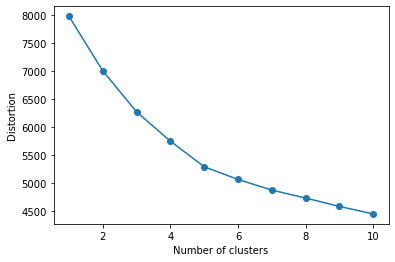

In [13]:
# elbow rule
plot_distortion(Y_sklearn,max_clusters=10)

In [14]:
from sklearn import metrics

def plot_silhouette(X,max_clusters = 10):
    sil_score = []
    for i in range(2, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        labels = km.labels_
        sil_score.append(metrics.silhouette_score(X, labels, metric='euclidean'))

    plt.plot(range(2,max_clusters +1), sil_score, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette score')
    plt.show()

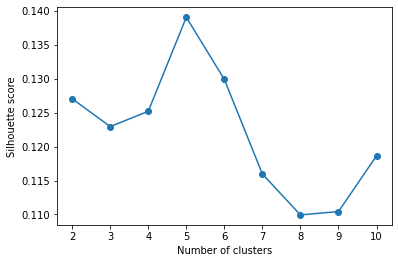

In [15]:
plot_silhouette(Y_sklearn,max_clusters=10)

In [18]:
 def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    for cluster in set(y_res):
        x = []
        y = []
        for i in range(len(X)):
            if y_res[i] == cluster:
                x.append(X.loc[i,X.columns.tolist()[0]])
                y.append(X.loc[i,X.columns.tolist()[1]])
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='black',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

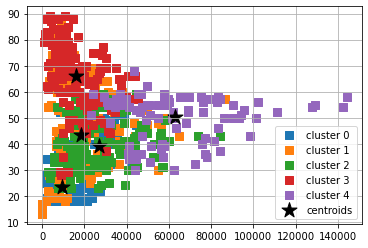

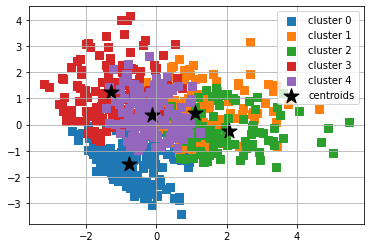

In [21]:
# Income vs age
km = KMeans(n_clusters=5,
           n_init=20,
           random_state=0)
y_km = km.fit_predict(X_scaled)
plot_clusters(X, y_km, plt_cluster_centers= True)

# PCA-1 vs PCA-2
km = KMeans(n_clusters=5,
           n_init=20,
           random_state=0)
y_km1 = km.fit_predict(Y_sklearn)
plot_clusters(Y_sklearn, y_km1, plt_cluster_centers= True)

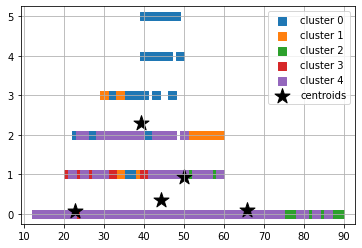

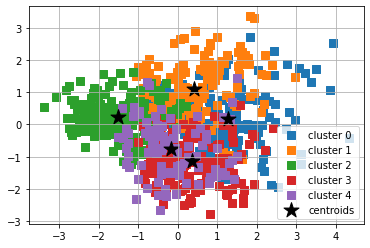

In [31]:
# Age vs number of children
km = KMeans(n_clusters=5,
           n_init=20,
           random_state=0)
y_km = km.fit_predict(X_scaled)
plot_clusters(X, y_km, plt_cluster_centers= True)

# PCA-2 VS PCA-4
km = KMeans(n_clusters=5,
           n_init=20,
           random_state=0)
y_km = km.fit_predict(Y_sklearn)
plot_clusters(Y_sklearn, y_km, plt_cluster_centers= True)

## Radar plots

In [558]:
import plotly.graph_objects as go

def radar_plots(r):
    categories = X_scaled.columns.tolist()

    fig = go.Figure()
    for i in range(len(r)):
        fig.add_trace(go.Scatterpolar(r=r[i], theta=categories))#, fill='toself'))

    fig.update_layout(showlegend=False)
    fig.show()

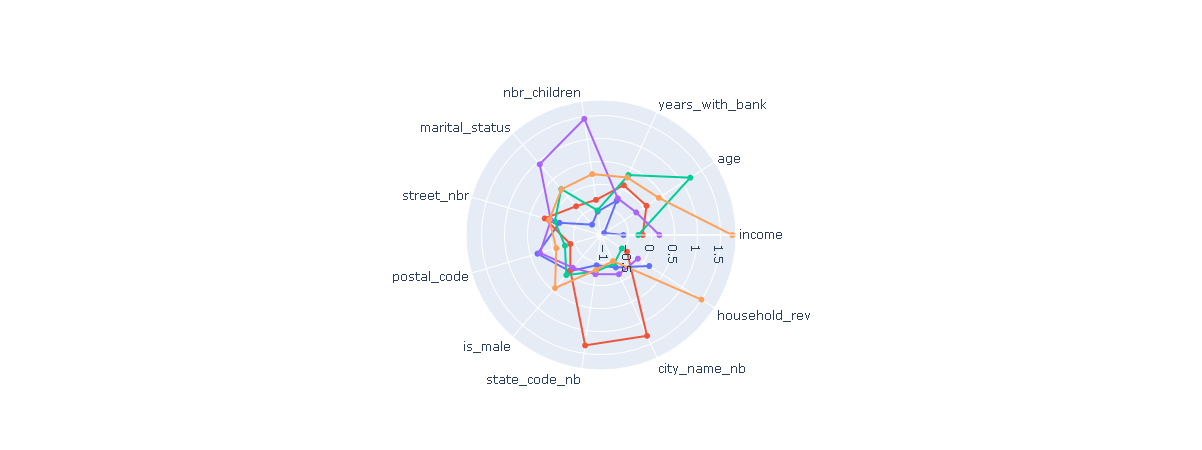

In [559]:
# Customer 'profile' for each cluster
clusters = []
for j in range(5):
    r = []
    for i in range(len(X_scaled)):
        if y_km[i]==j:
            r.append(X_scaled.loc[i].values.tolist())
    clusters.append(pd.DataFrame(r).mean())
radar_plots(clusters)

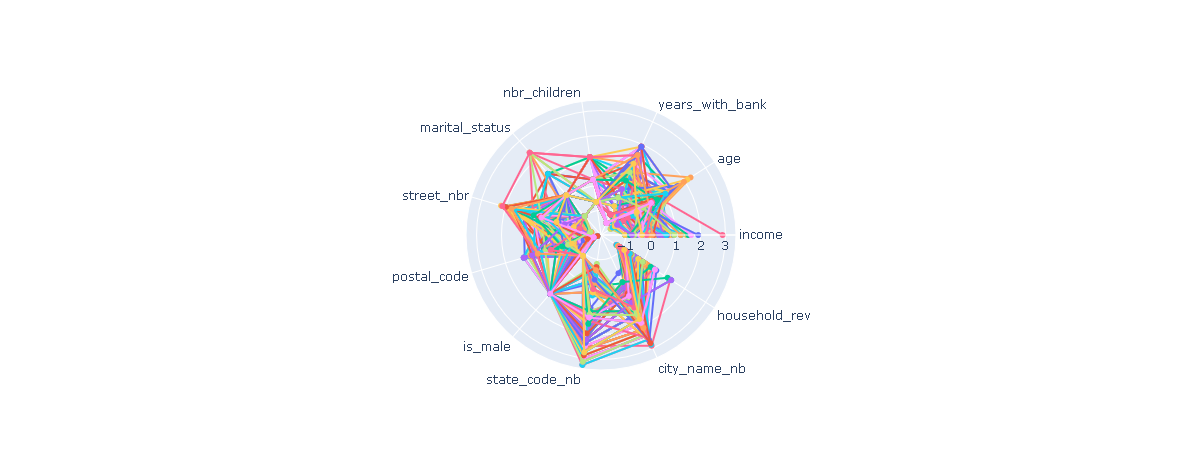

In [560]:
# Radar plot within a given cluster
r = []
for i in range(len(X_scaled)):
    if y_km[i]==1:
        r.append(X_scaled.loc[i].values.tolist())
radar_plots(r)

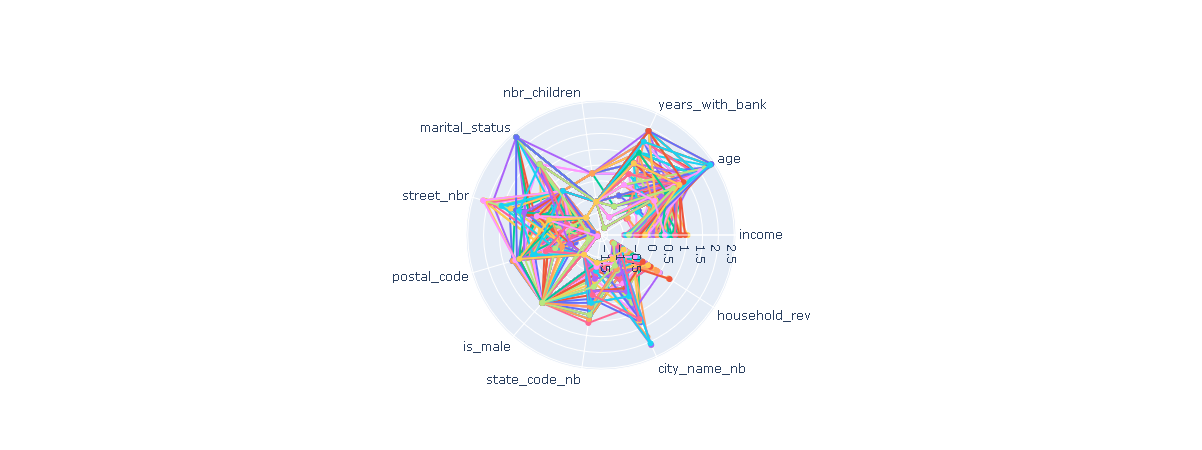

In [561]:
r = []
for i in range(len(X_scaled)):
    if y_km[i]==2:
        r.append(X_scaled.loc[i].values.tolist())
radar_plots(r)

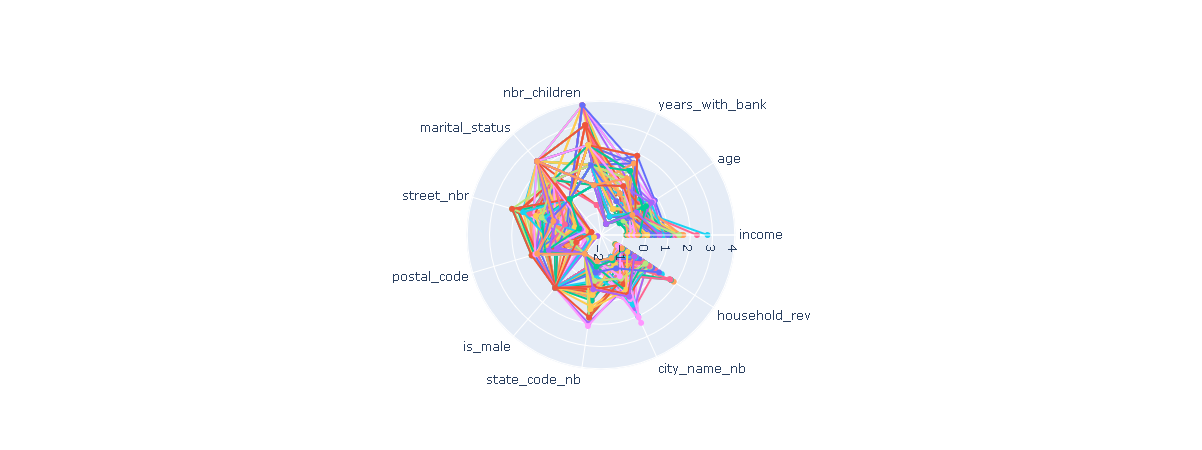

In [562]:
r = []
for i in range(len(X_scaled)):
    if y_km[i]==3:
        r.append(X_scaled.loc[i].values.tolist())
radar_plots(r)

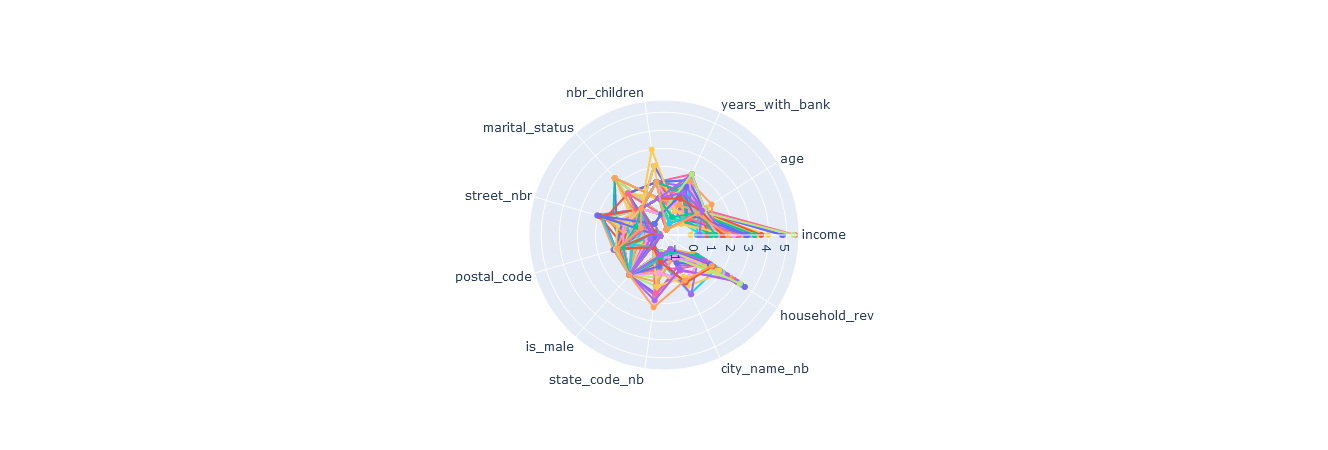

In [563]:
r = []
for i in range(len(X_scaled)):
    if y_km[i]==4:
        r.append(X_scaled.loc[i].values.tolist())
radar_plots(r)

## Cluster evolution by Kmeans - iteration

Iteration 1


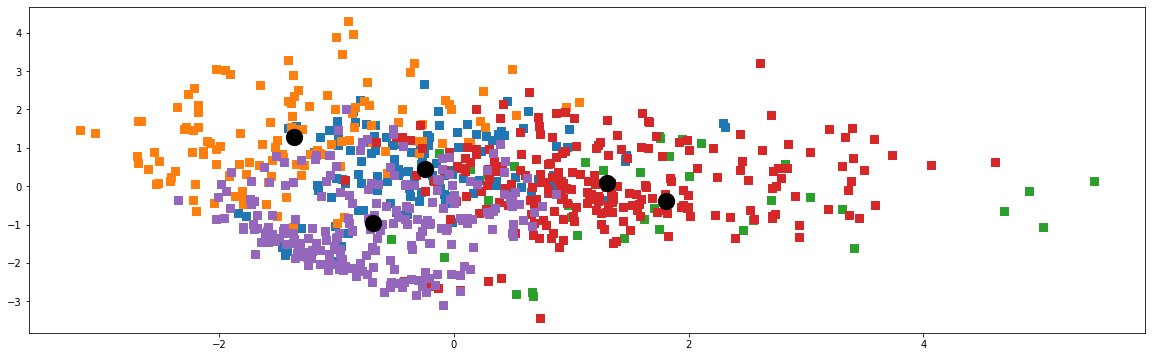

Iteration 2


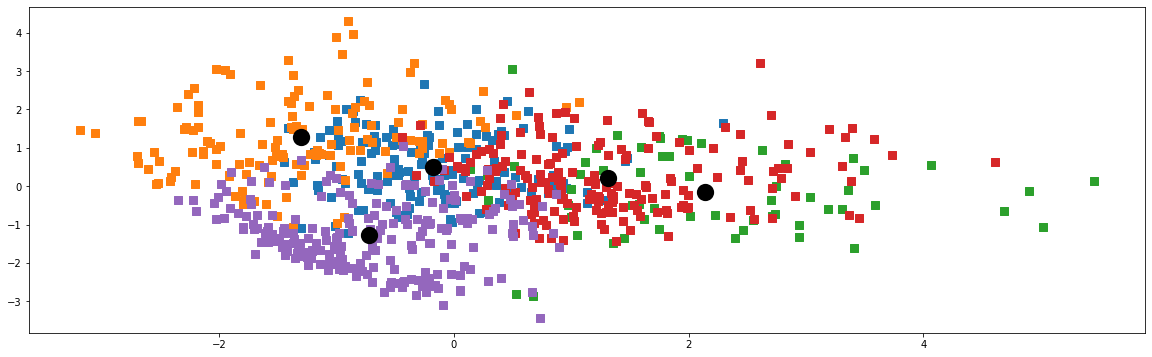

Iteration 3


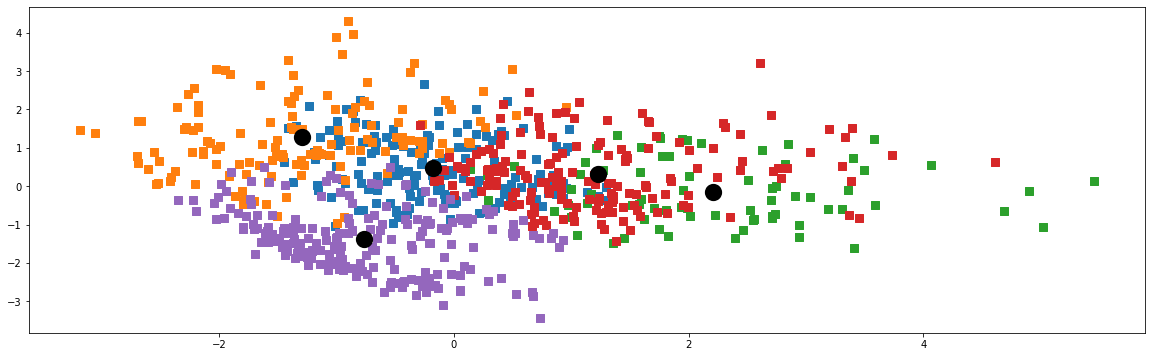

Iteration 4


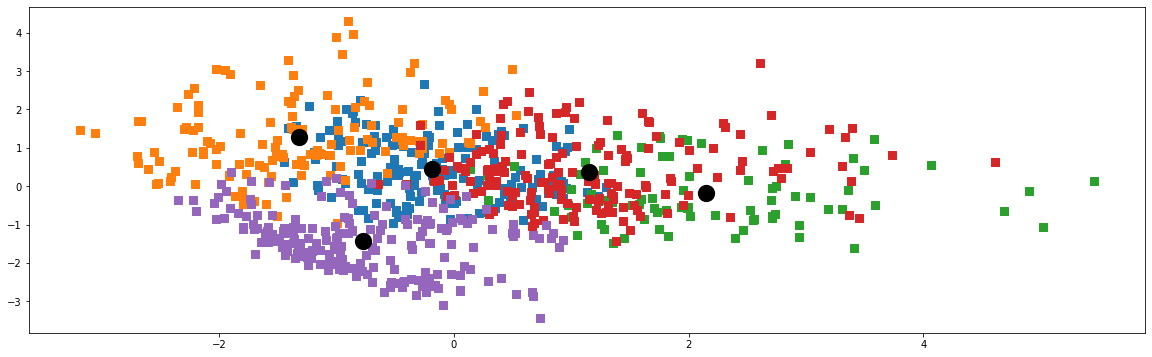

Iteration 5


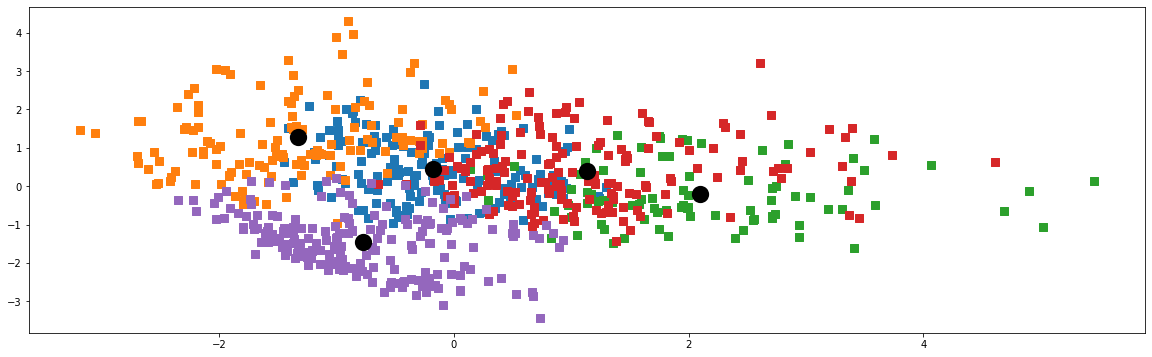

Iteration 6


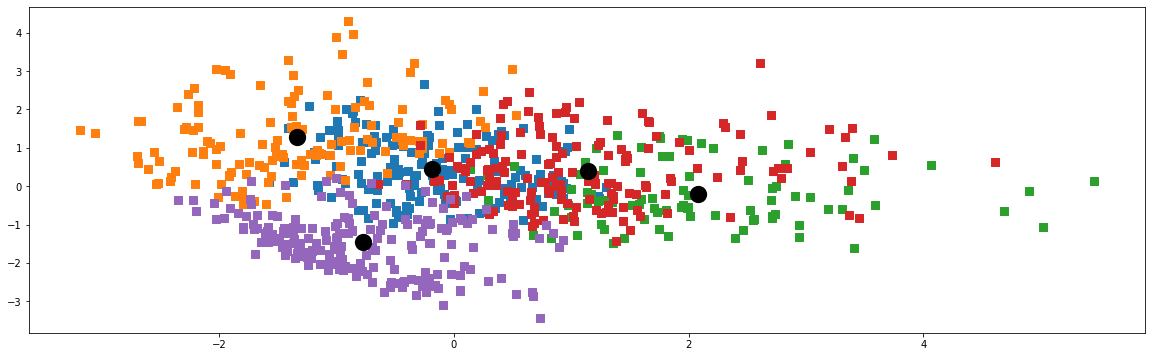

Iteration 7


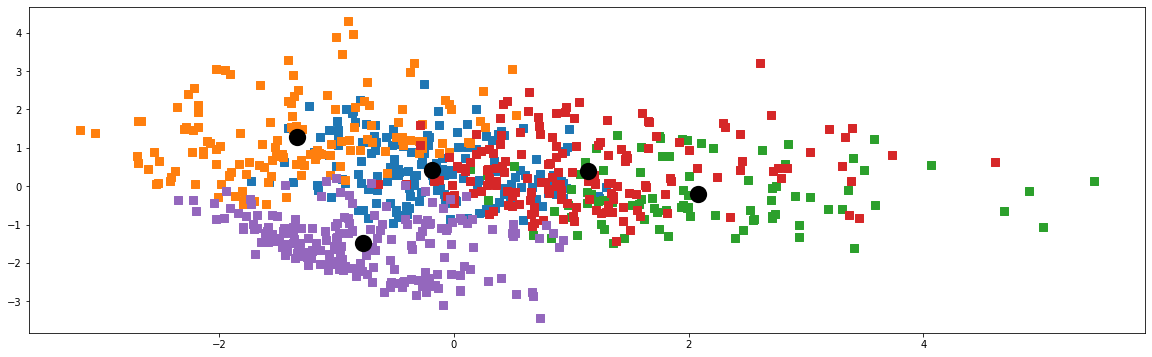

Iteration 8


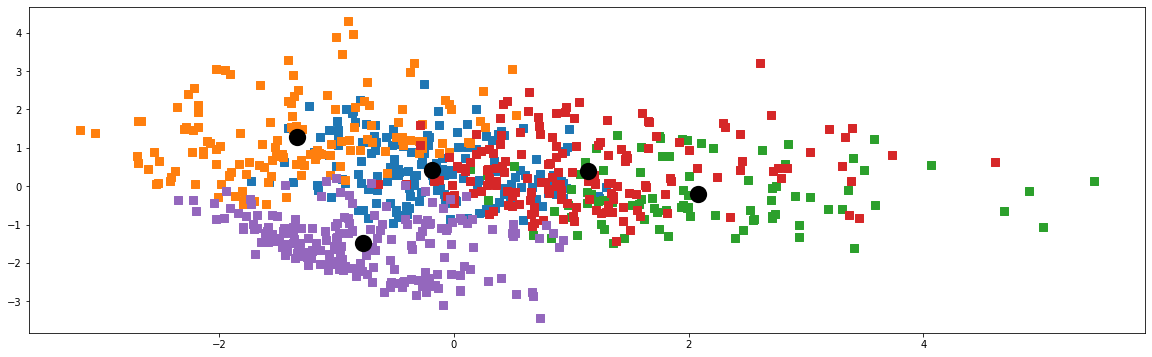

Iteration 9


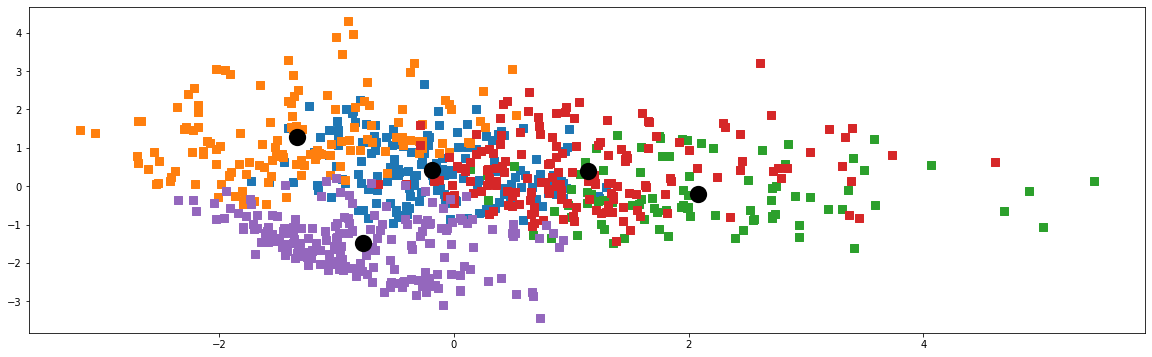

Iteration 10


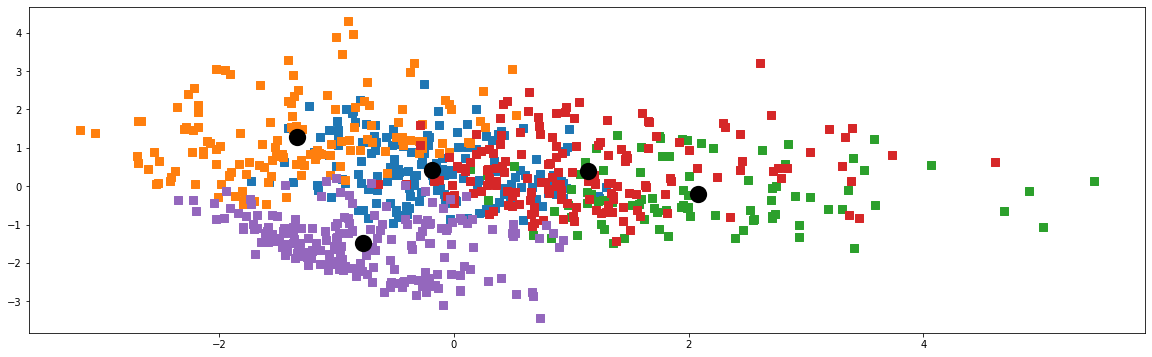

Iteration 11


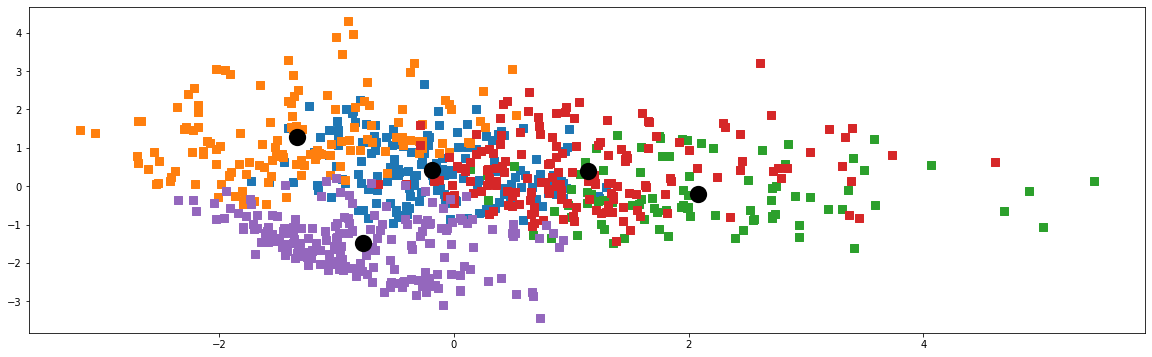

Iteration 12


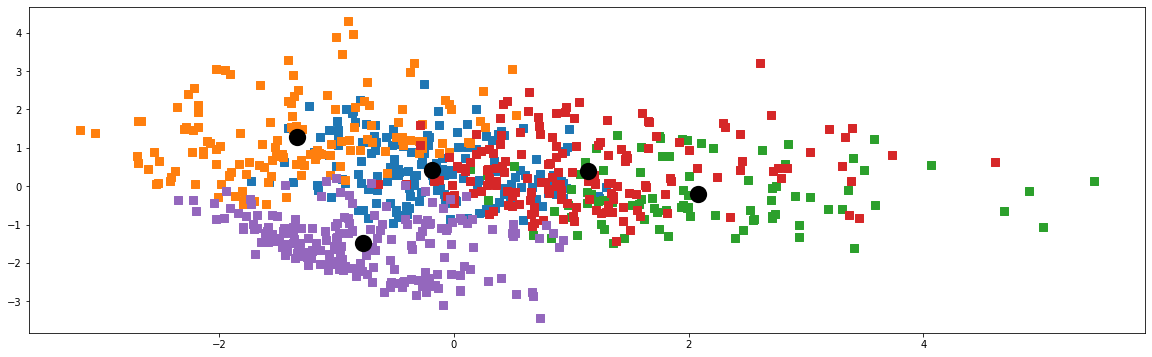

Iteration 13


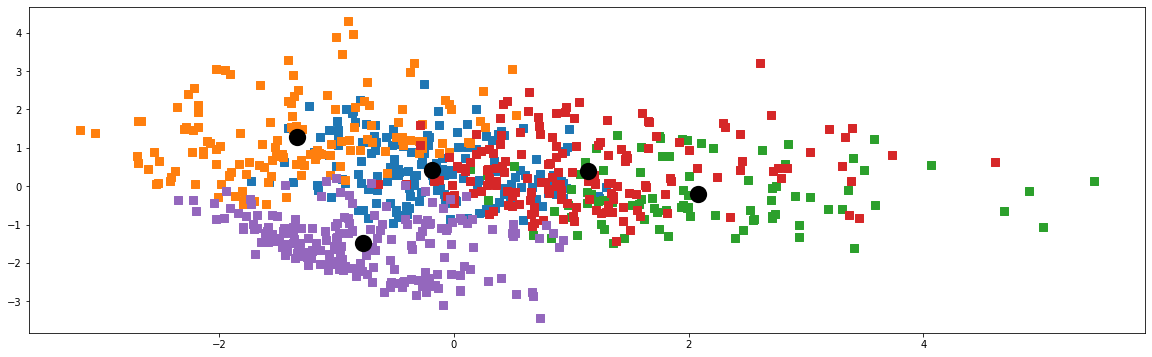

Iteration 14


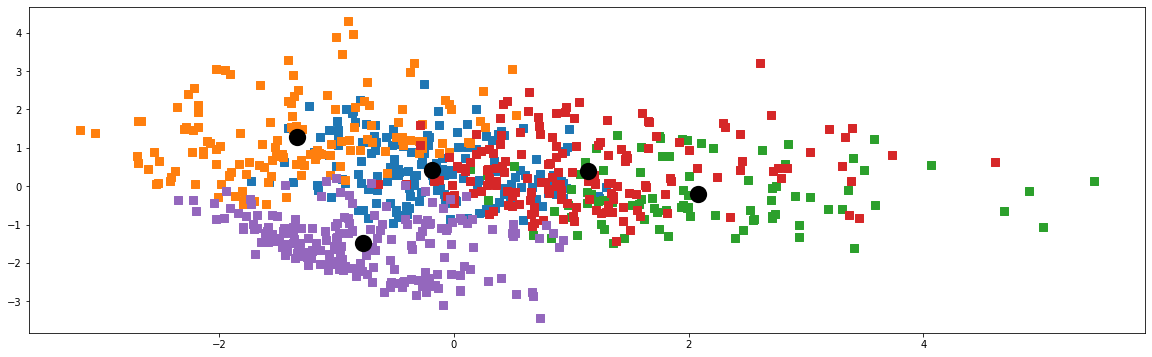

Iteration 15


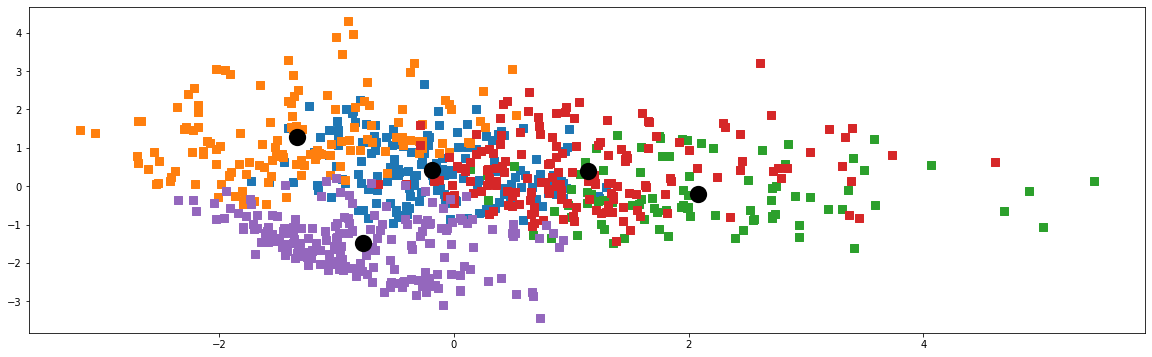

Iteration 16


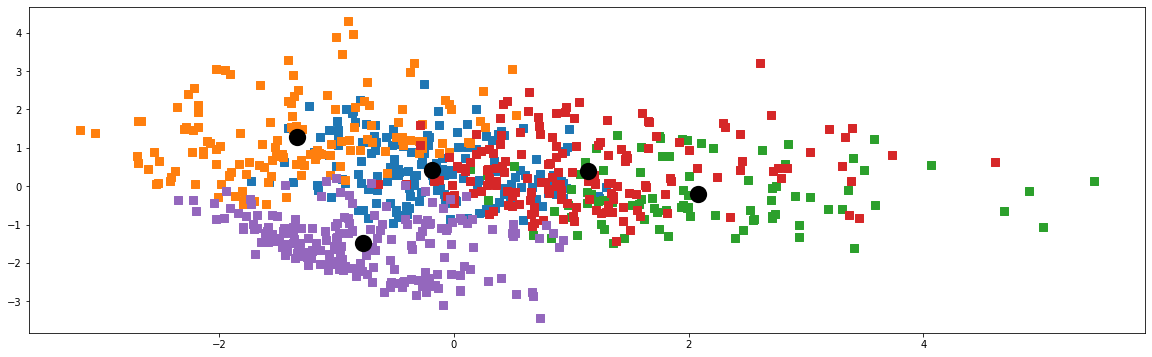

Iteration 17


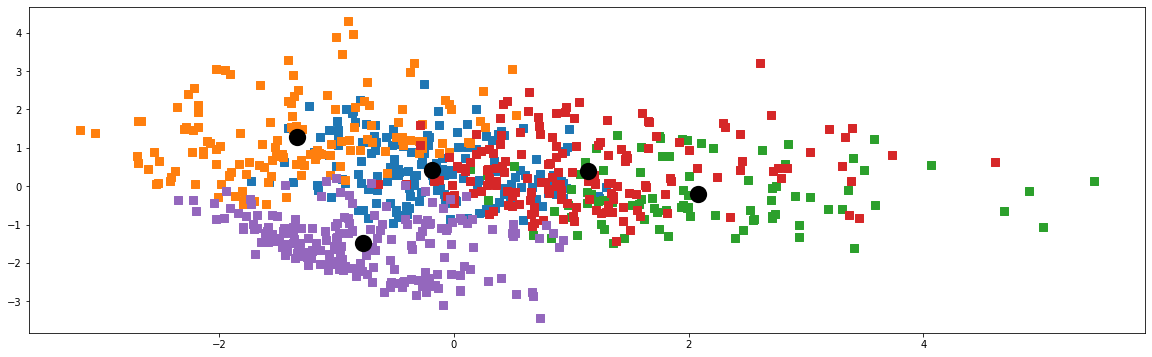

Iteration 18


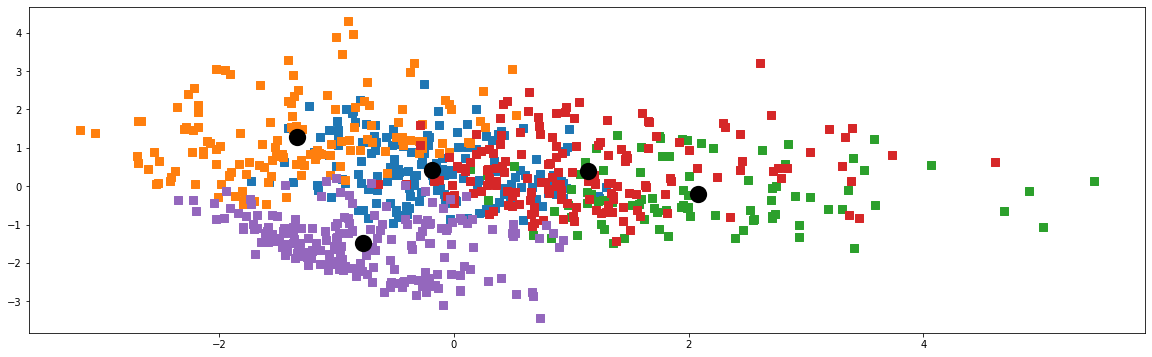

Iteration 19


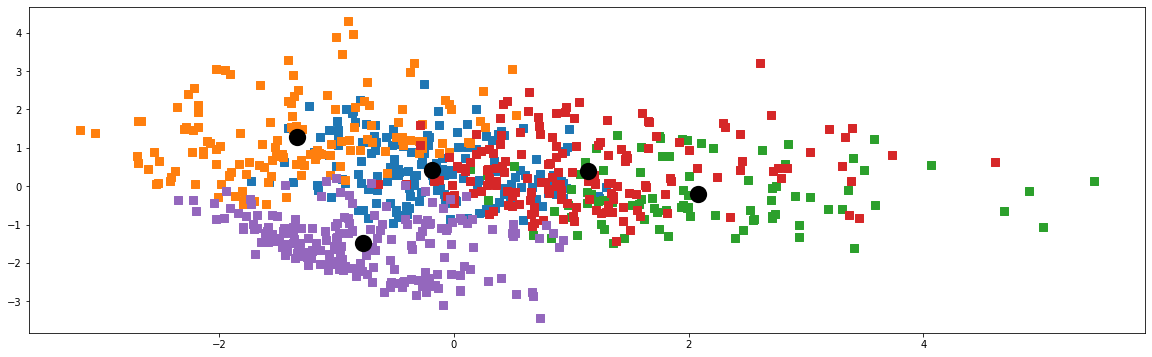

Iteration 20


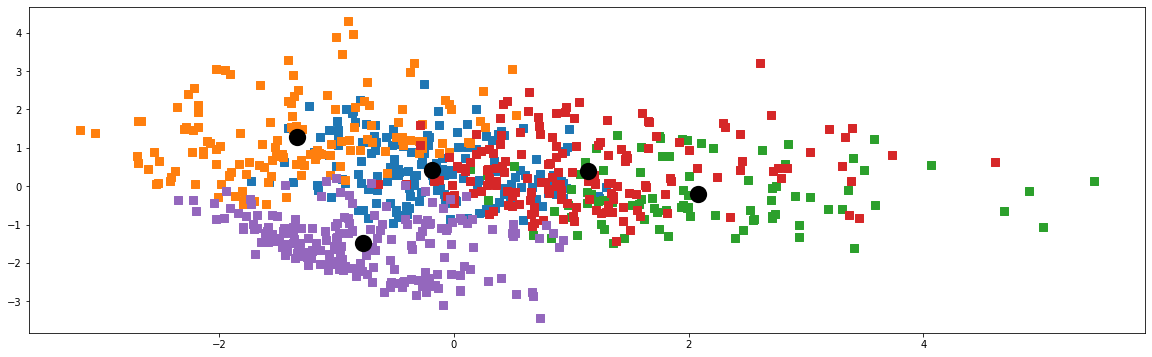

In [353]:
import random
# https://pythonprogramming.net/k-means-from-scratch-machine-learning-tutorial/

firsts = []
for i in range(5):
      firsts.append(random.randint(0, len(Y_sklearn)-1))

for z in range(1,21):
    print(f'Iteration {z}')
    class K_Means:
        def __init__(self, k=5, tol=0.0, max_iter=z):
            self.k = k
            self.tol = tol
            self.max_iter = max_iter

        def fit(self,data):

            self.centroids = {}

            # assing centroids to random points from dataset
            for i in range(self.k):
                self.centroids[i] = data[firsts[i]]

            for i in range(self.max_iter):
                self.classifications = {}

                for j in range(self.k):
                    self.classifications[j] = []
                    
                # iterate through our features, calculate distances of the features to the current centroids, and classify them as such
                for featureset in data:
                    distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                    classification = distances.index(min(distances))
                    self.classifications[classification].append(featureset)

                prev_centroids = dict(self.centroids)

                for classification in self.classifications:
                    self.centroids[classification] = np.average(self.classifications[classification],axis=0)

                optimized = True

                for c in self.centroids:
                    original_centroid = prev_centroids[c]
                    current_centroid = self.centroids[c]
                    if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                        #print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                        optimized = False

                if optimized:
                    break

        def predict(self,data):
            distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
            classification = distances.index(min(distances))
            return classification

    colors = 10*[u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd']

    clf = K_Means()
    clf.fit(Y_sklearn.to_numpy())

    for classification in clf.classifications:
        color = colors[classification]
        for featureset in clf.classifications[classification]:
            plt.scatter(featureset[0], featureset[1], marker="s", color=color, s=50, linewidths=1)
        
    for centroid in clf.centroids:
        plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker="o", color="k", s=150, linewidths=5)

    plt.show()

# TWM BEHAVIOUR

In [564]:
accounts = pd.read_csv('twm_accounts.csv',sep=';')

In [565]:
checking_acct = pd.read_csv('twm_checking_acct.csv',sep=';')

In [566]:
checking_tran = pd.read_csv('twm_checking_tran.csv',sep=';')

In [567]:
credit_acct = pd.read_csv('twm_credit_acct.csv',sep=';')

In [568]:
credit_tran = pd.read_csv('twm_credit_tran.csv',sep=';')

In [569]:
savings_acct = pd.read_csv('twm_savings_acct.csv',sep=';')

In [570]:
savings_tran = pd.read_csv('twm_savings_tran.csv',sep=';')

In [571]:
transactions = pd.read_csv('twm_transactions.csv',sep=';')

In [572]:
twm_customer.set_index('cust_id',inplace=True)

## SOME FEATURE ENGINEERING

In [573]:
# Types of account per customer -> inactive accounts are not counted
twm_customer['has_CK'] = 0
twm_customer['has_SV'] = 0
twm_customer['has_CC'] = 0
for i in range(len(accounts)):
    cust_id = accounts.loc[i,'cust_id']
    if (accounts.loc[i,'acct_type'].rstrip() == 'CK') & (accounts.loc[i,'account_active'].rstrip() == 'Y'):
        twm_customer.loc[cust_id,'has_CK'] +=1
    elif (accounts.loc[i,'acct_type'].rstrip() == 'CC') & (accounts.loc[i,'account_active'].rstrip() == 'Y'):
        twm_customer.loc[cust_id,'has_CC'] +=1
    elif (accounts.loc[i,'acct_type'].rstrip() == 'SV') & (accounts.loc[i,'account_active'].rstrip() == 'Y'):
        twm_customer.loc[cust_id,'has_SV'] +=1

In [574]:
# Net at the beginning and end of year (1995)
# Transactions per account type (12 monhts)
# $ per transactions per account type
twm_customer['net_start'] = 0
twm_customer['net_end'] = 0
twm_customer['ck_trans'] = 0
twm_customer['cc_trans'] = 0
twm_customer['sv_trans'] = 0
twm_customer['ck_$_per_tran'] = 0
twm_customer['cc_$_per_tran'] = 0
twm_customer['sv_$_per_tran'] = 0
for i in range(len(accounts)):
    cust_id = accounts.loc[i,'cust_id']
    if accounts.loc[i,'account_active'].rstrip() == 'Y':
        if accounts.loc[i,'acct_type'].rstrip() == 'CK':
            try:
                tran = checking_tran[checking_tran['cust_id']==cust_id].sort_values(by='tran_id')
                twm_customer.loc[cust_id,'net_start'] += (tran.iloc[0]['new_balance']-tran.iloc[0]['tran_amt'])
                twm_customer.loc[cust_id,'net_end'] += tran.iloc[-1]['new_balance']
                twm_customer.loc[cust_id,'ck_trans'] += tran.iloc[-1]['tran_id']
                twm_customer.loc[cust_id,'ck_$_per_tran'] += (tran.iloc[-1]['new_balance']-(tran.iloc[0]['new_balance']-tran.iloc[0]['tran_amt']))/tran.iloc[-1]['tran_id']
            except:
                pass
        elif accounts.loc[i,'acct_type'].rstrip() == 'CC':
            try:
                tran = credit_tran[credit_tran['cust_id']==cust_id].sort_values(by='tran_id')
                twm_customer.loc[cust_id,'net_start'] += (tran.iloc[0]['new_balance']-tran.iloc[0]['tran_amt'])
                twm_customer.loc[cust_id,'net_end'] += tran.iloc[-1]['new_balance']
                twm_customer.loc[cust_id,'cc_trans'] += tran.iloc[-1]['tran_id']
                twm_customer.loc[cust_id,'cc_$_per_tran'] += (tran.iloc[-1]['new_balance']-(tran.iloc[0]['new_balance']-tran.iloc[0]['tran_amt']))/tran.iloc[-1]['tran_id']
            except:
                pass
        elif accounts.loc[i,'acct_type'].rstrip() == 'SV':
            try:
                tran = savings_tran[savings_tran['cust_id']==cust_id].sort_values(by='tran_id')
                twm_customer.loc[cust_id,'net_start'] += (tran.iloc[0]['new_balance']-tran.iloc[0]['tran_amt'])
                twm_customer.loc[cust_id,'net_end'] += tran.iloc[-1]['new_balance']
                twm_customer.loc[cust_id,'sv_trans'] += tran.iloc[-1]['tran_id']
                twm_customer.loc[cust_id,'sv_$_per_tran'] += (tran.iloc[-1]['new_balance']-(tran.iloc[0]['new_balance']-tran.iloc[0]['tran_amt']))/tran.iloc[-1]['tran_id']
            except:
                pass

In [575]:
# Net $ relative to year income
twm_customer['net_end_rel'] = np.where(twm_customer['income']>0, twm_customer['net_end']/twm_customer['income'], np.sign(twm_customer['net_end']))
# Net change relative to year income
twm_customer['net_gain_rel'] = np.where(twm_customer['income']>0, (twm_customer['net_end']-twm_customer['net_start'])/twm_customer['income'], np.sign(twm_customer['net_end']-twm_customer['net_start']))

In [576]:
twm_customer.head()

,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,...,net_start,net_end,ck_trans,cc_trans,sv_trans,ck_$_per_tran,cc_$_per_tran,sv_$_per_tran,net_end_rel,net_gain_rel
cust_id,,,,,,,,,,,,,,,,,,,,,
1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,...,0.00,0.00,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,...,2781.07,-147.02,52,32,0,-26.535769,-48.382188,0.000000,-0.022259,-0.443314
1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,...,-553.68,-164.15,0,68,48,0.000000,5.588676,0.197917,-0.008850,0.021001
1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,...,1087.95,613.09,93,0,12,-5.203548,0.000000,0.755833,0.012862,-0.009962
1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,...,-791.35,754.99,99,22,12,-54.895859,317.147727,0.315000,0.016946,0.034707


## CREATE DATAFRAME OF NUMERIC VALUES

In [577]:
numeric_feats = twm_customer.dtypes[twm_customer.dtypes != 'object'].index.tolist()
X = pd.DataFrame(twm_customer,columns=numeric_feats)
X.head()

,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code,is_male,state_code_nb,city_name_nb,...,net_start,net_end,ck_trans,cc_trans,sv_trans,ck_$_per_tran,cc_$_per_tran,sv_$_per_tran,net_end_rel,net_gain_rel
cust_id,,,,,,,,,,,,,,,,,,,,,
1362691,26150,46,5,1,2,8298,89194,1,27,55,...,0.00,0.00,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
1362487,6605,71,1,0,2,10603,90159,1,0,1,...,2781.07,-147.02,52,32,0,-26.535769,-48.382188,0.000000,-0.022259,-0.443314
1363160,18548,38,8,0,1,8817,90024,0,0,1,...,-553.68,-164.15,0,68,48,0.000000,5.588676,0.197917,-0.008850,0.021001
1362752,47668,54,3,0,1,676,90172,0,0,1,...,1087.95,613.09,93,0,12,-5.203548,0.000000,0.755833,0.012862,-0.009962
1362548,44554,59,9,2,4,6578,10138,0,1,0,...,-791.35,754.99,99,22,12,-54.895859,317.147727,0.315000,0.016946,0.034707


## SCALING

In [578]:
columns = X.columns.tolist()
scaller = StandardScaler()
X_scaled = pd.DataFrame(scaller.fit_transform(X.astype(float)))
X_scaled.columns = columns

## PCA

In [579]:
# set explained variance to 95%
sklearn_pca = sklearnPCA(n_components=0.95)
Y_sklearn = sklearn_pca.fit_transform(X_scaled)

In [580]:
selected_columns = []
for i in range(Y_sklearn.shape[1]):
    selected_columns.append('PC-'+str(i+1))
print(pd.DataFrame(sklearn_pca.components_,columns=X_scaled.columns,index = selected_columns))
Y_sklearn = pd.DataFrame(Y_sklearn, columns = selected_columns)

         income       age  years_with_bank  nbr_children  marital_status  \
PC-1   0.191200  0.135360        -0.048059      0.087407        0.166589   
PC-2   0.016842 -0.176236        -0.001839     -0.064315       -0.142301   
PC-3   0.381966  0.076334         0.016241      0.244680        0.148601   
PC-4   0.300785  0.149228         0.080787      0.323347        0.336510   
PC-5   0.131345  0.311333         0.228818      0.124816        0.264408   
PC-6   0.276229 -0.129690         0.018403     -0.248073       -0.420555   
PC-7  -0.006718 -0.501440        -0.515876      0.470819        0.139525   
PC-8  -0.002385 -0.217328         0.082767      0.114970       -0.054077   
PC-9  -0.069715  0.131183        -0.321085      0.013072        0.178127   
PC-10  0.102346  0.018560        -0.403158     -0.057530        0.000914   
PC-11 -0.027256 -0.000042         0.010214      0.019867        0.035320   
PC-12 -0.005386  0.048117         0.072616     -0.048416        0.106738   
PC-13 -0.238

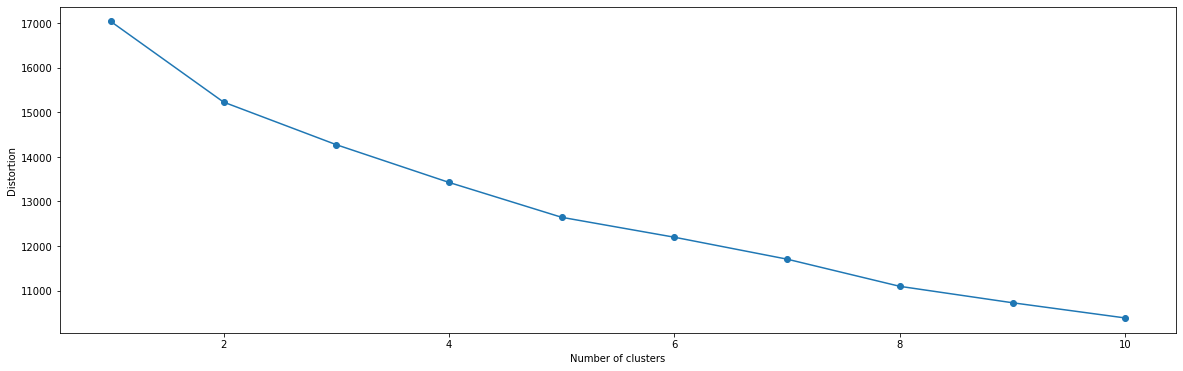

In [581]:
plot_distortion(Y_sklearn,max_clusters=10)

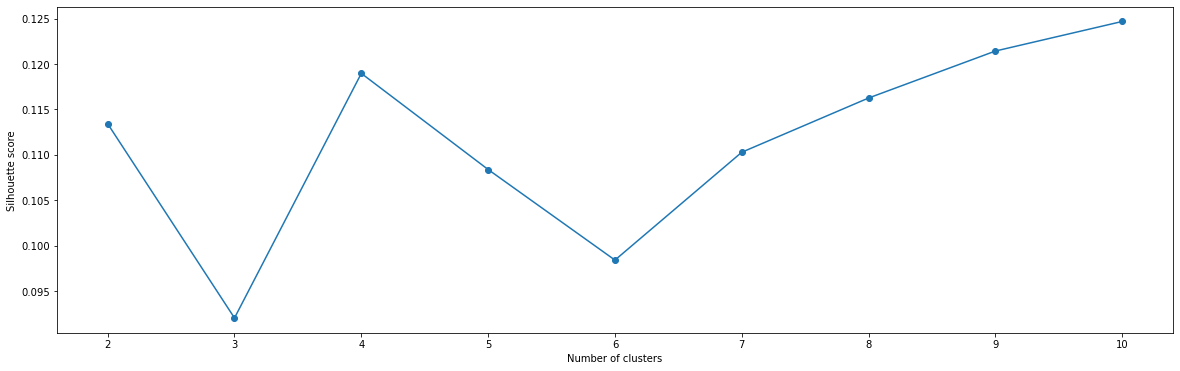

In [582]:
plot_silhouette(Y_sklearn,max_clusters=10)

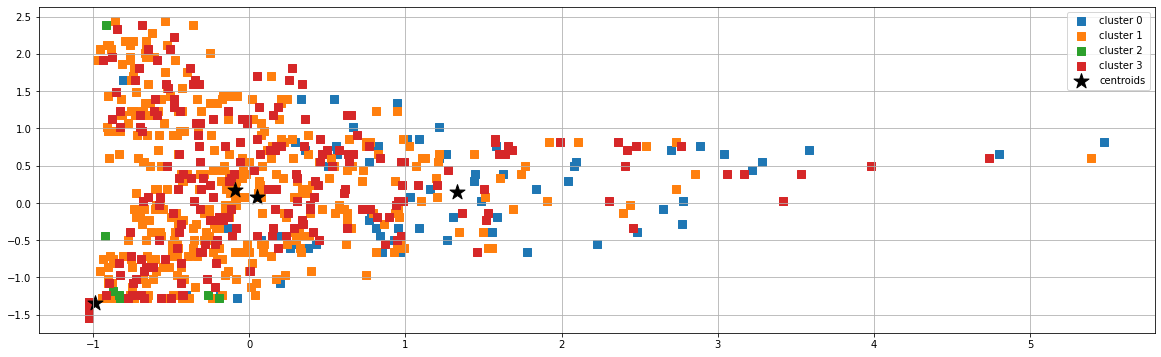

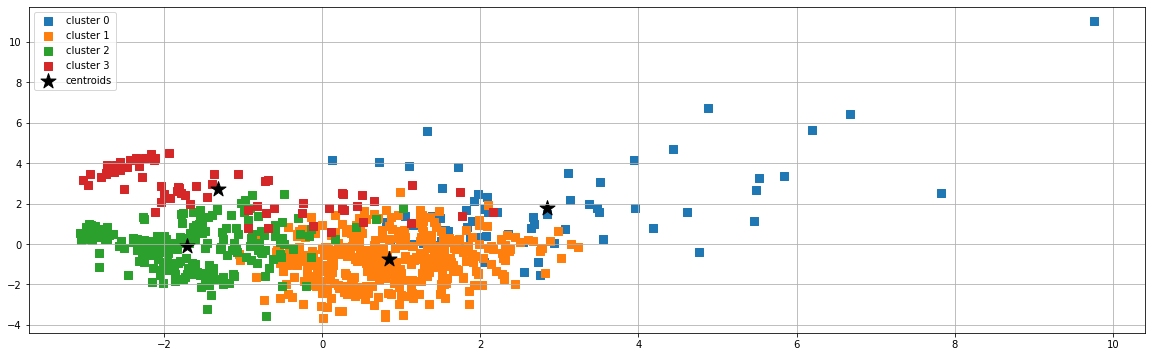

array([[ 2.84780475e+00,  1.79160850e+00,  1.80539958e+00,
        -8.43039605e-03,  1.93825353e-01,  6.79568111e-01,
        -2.21871721e-01, -7.11928695e-02, -2.53838569e-01,
         1.40258717e-01,  1.20596142e-01, -1.19031106e-01,
         1.51426935e-01,  1.07926153e-01, -1.02565790e-01,
        -2.73925828e-01,  1.84629939e-01,  6.40733996e-02],
       [ 8.41345698e-01, -7.64461251e-01, -3.58189112e-01,
        -2.13905884e-01, -1.13858280e-01, -3.15579332e-01,
         2.15099781e-02,  1.73302183e-01,  3.07788696e-02,
        -4.77518145e-02, -2.08910720e-01,  1.48927836e-01,
        -1.21162605e-01, -1.16832287e-01,  1.12916365e-01,
         1.61346109e-02,  4.31972128e-02,  1.49955129e-02],
       [-1.70785395e+00, -9.30281177e-02,  4.27400081e-01,
         5.11990251e-01,  3.98753883e-01,  2.84394592e-01,
        -1.21312553e-01, -3.19794785e-01,  1.16075207e-01,
         1.04308858e-01,  3.91589584e-01, -2.84115768e-01,
         2.57985937e-01,  2.32909151e-02,  4.04206138e

In [585]:
km = KMeans(n_clusters=4,
           n_init=20,
           random_state=0)
y_km = km.fit_predict(X_scaled)
plot_clusters(X_scaled, y_km, plt_cluster_centers= True)

km = KMeans(n_clusters=4,
           n_init=20,
           random_state=0)
y_km = km.fit_predict(Y_sklearn)
plot_clusters(Y_sklearn, y_km, plt_cluster_centers= True)

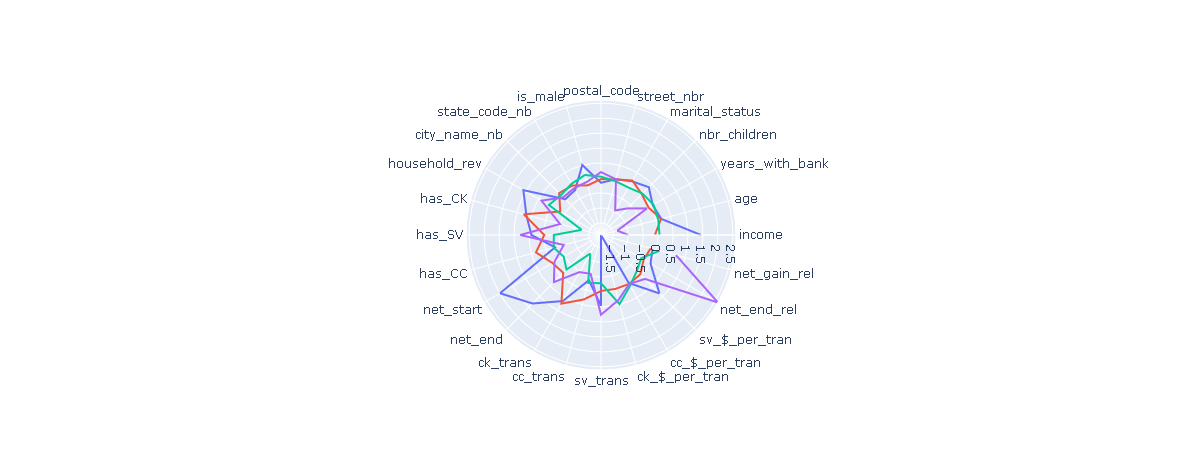

In [584]:
clusters = []
for j in range(4):
    r = []
    for i in range(len(X_scaled)):
        if y_km[i]==j:
            r.append(X_scaled.loc[i].values.tolist())
    clusters.append(pd.DataFrame(r).mean())
radar_plots(clusters)

Iteration 1


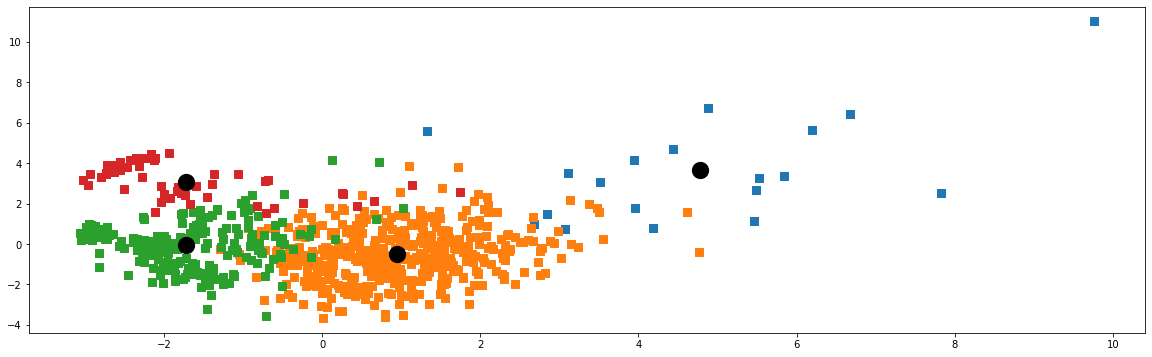

Iteration 2


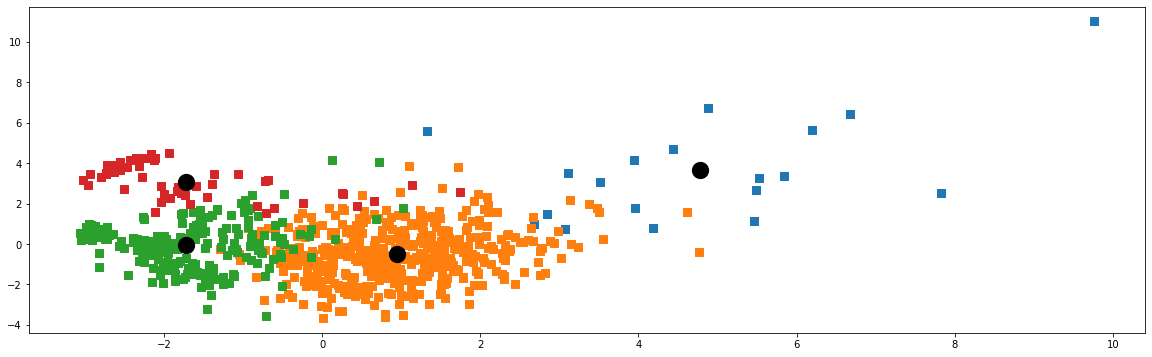

Iteration 3


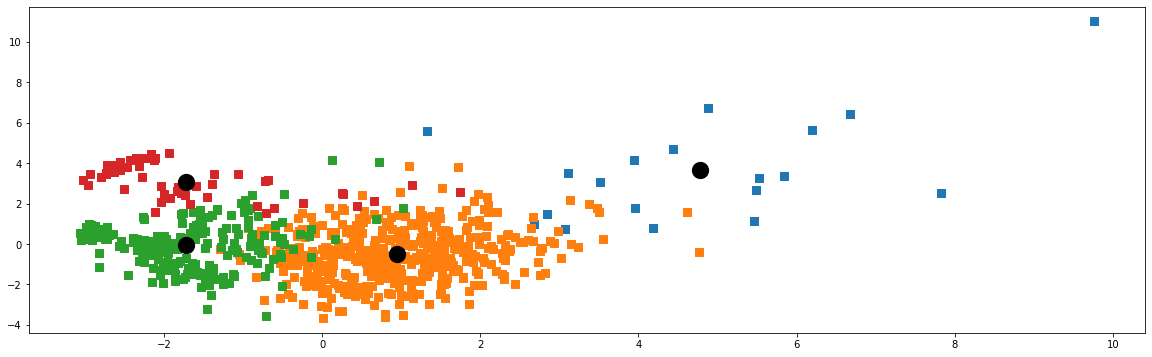

Iteration 4


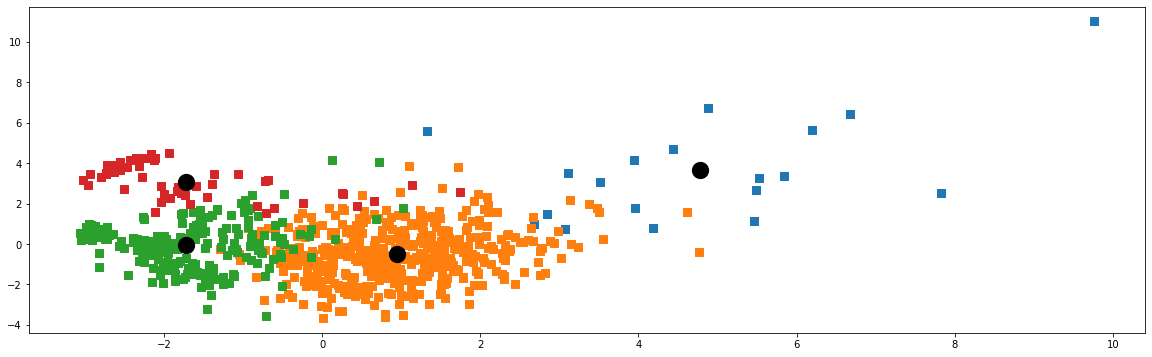

Iteration 5


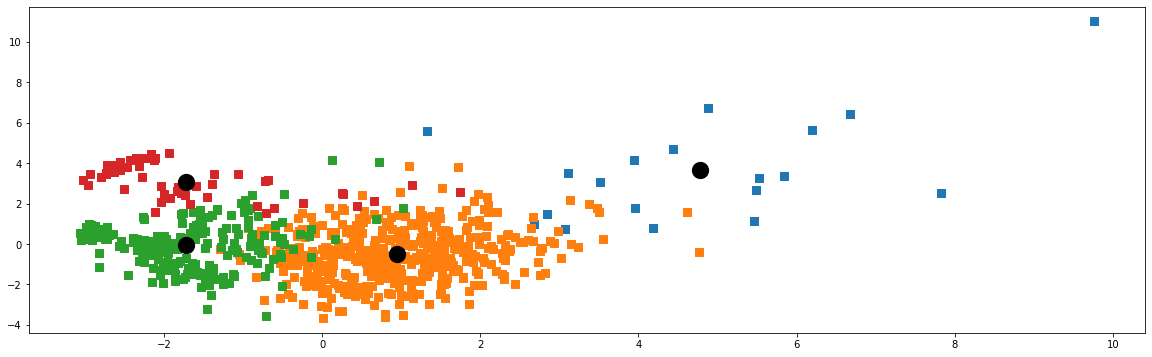

Iteration 6


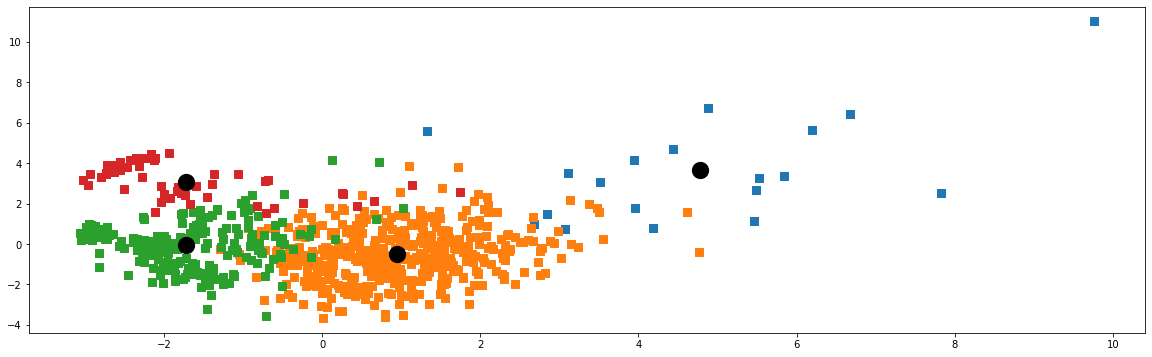

Iteration 7


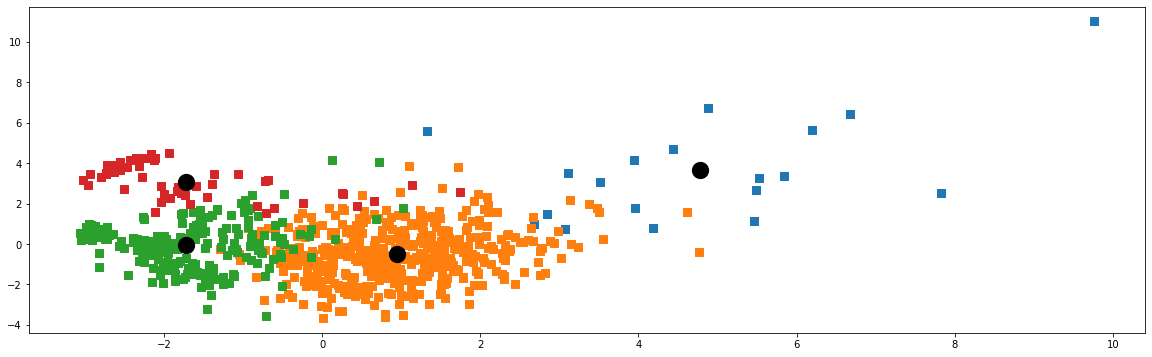

Iteration 8


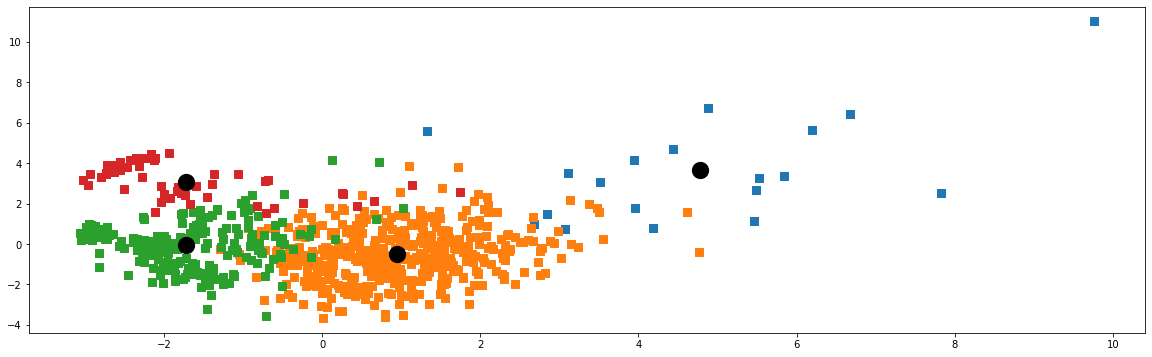

Iteration 9


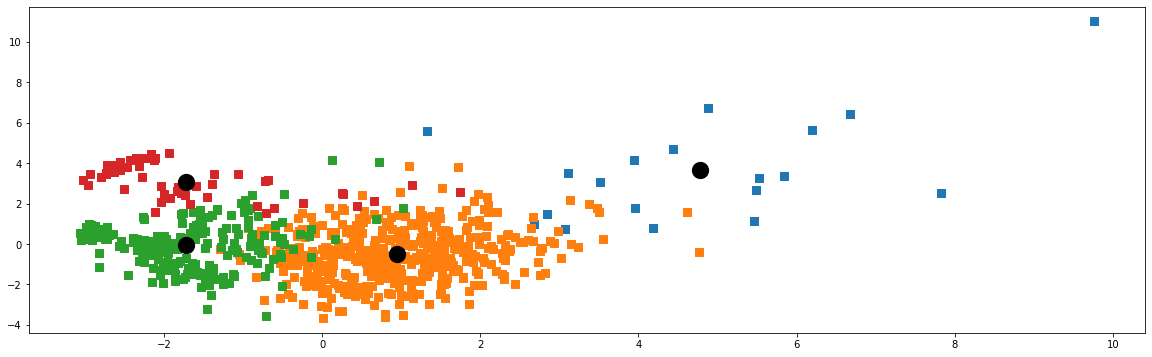

Iteration 10


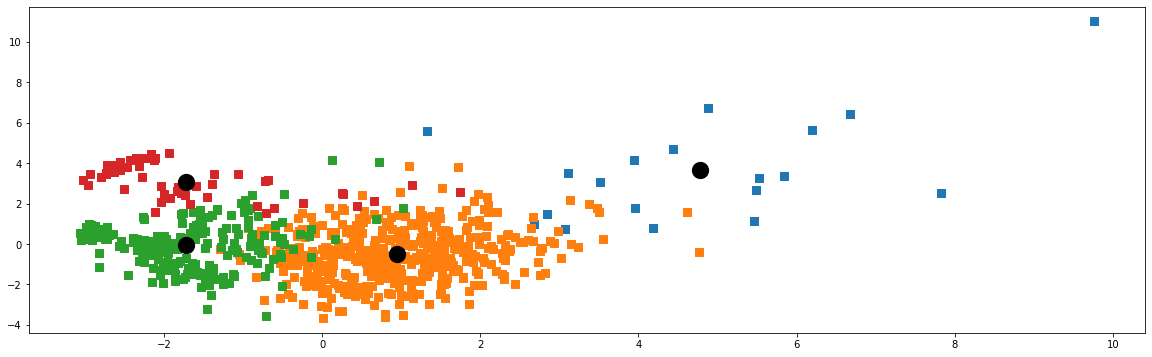

Iteration 11


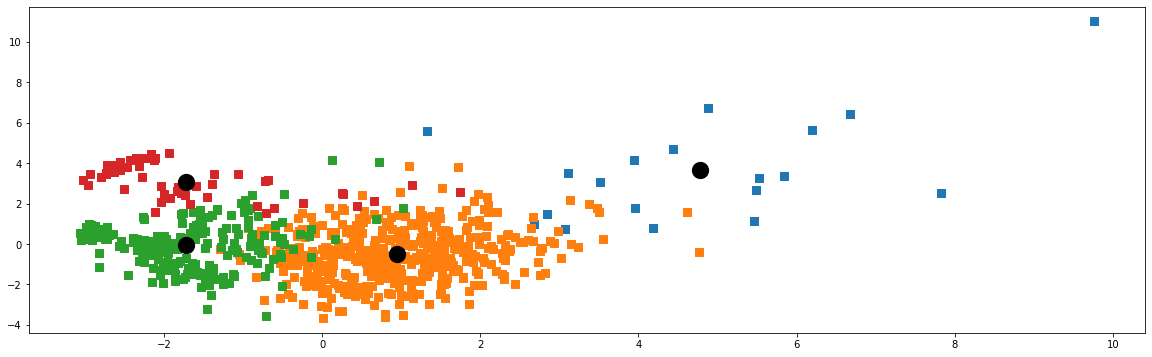

Iteration 12


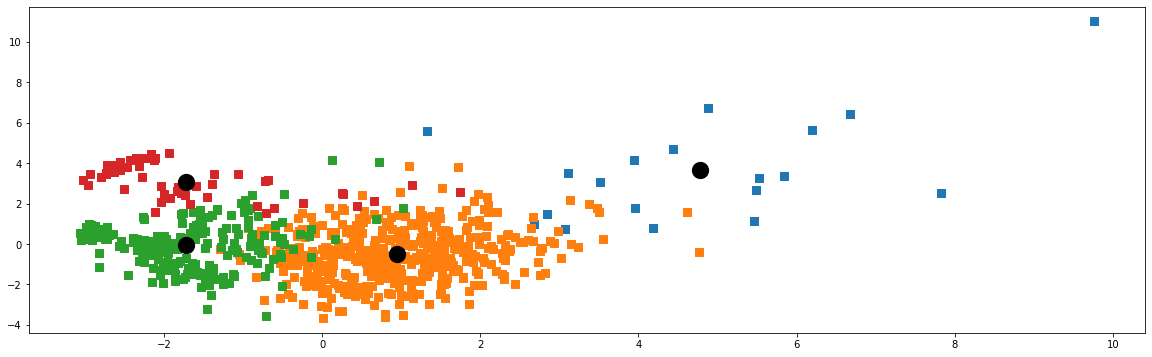

Iteration 13


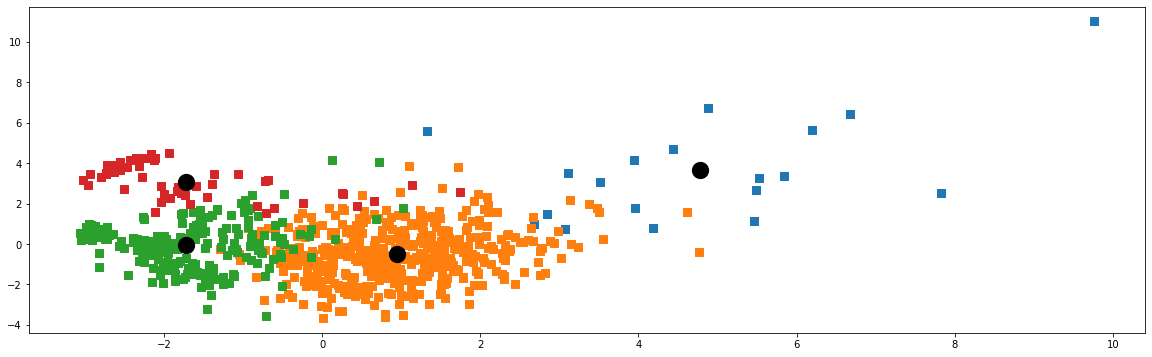

Iteration 14


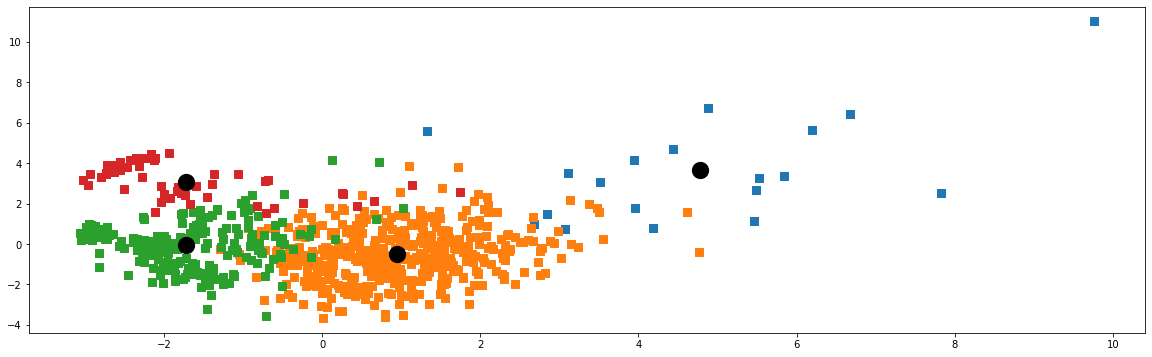

Iteration 15


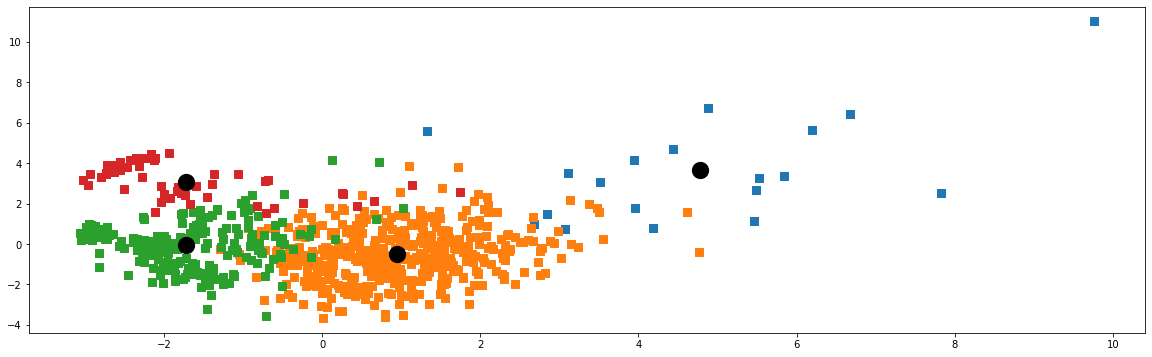

Iteration 16


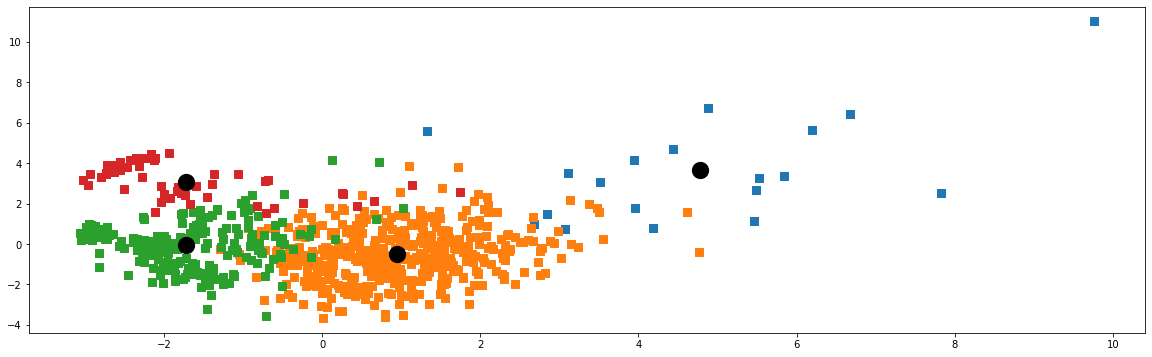

Iteration 17


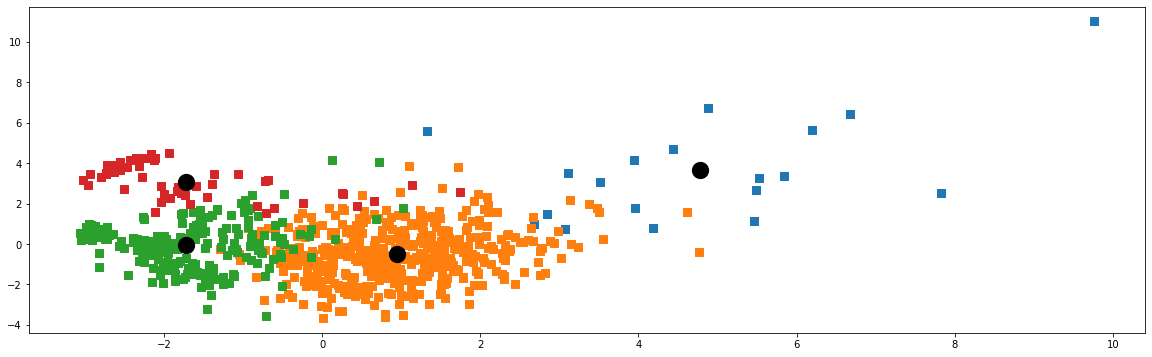

Iteration 18


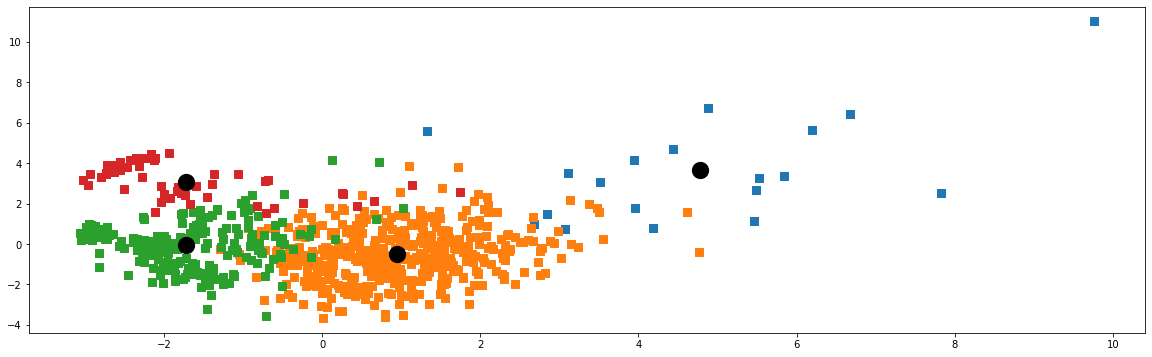

Iteration 19


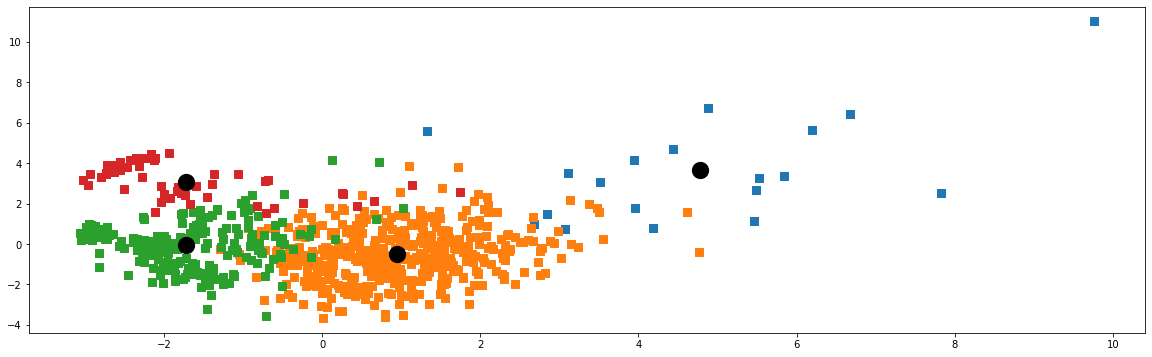

Iteration 20


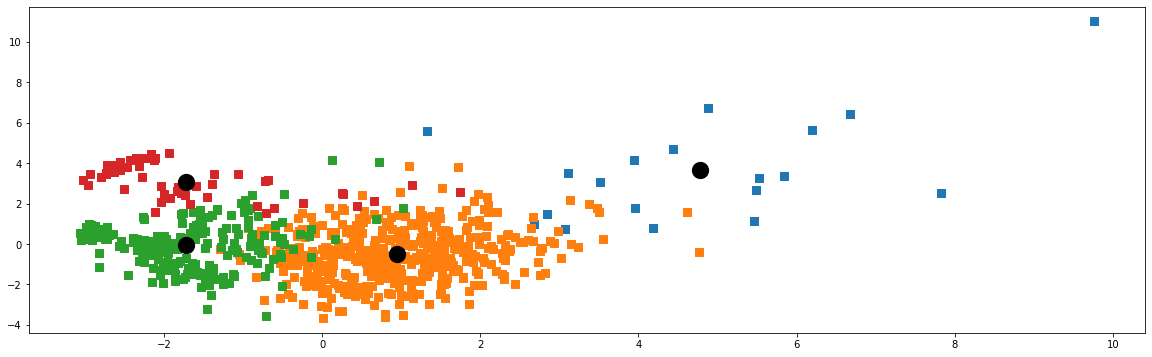

In [625]:
import random
# https://pythonprogramming.net/k-means-from-scratch-machine-learning-tutorial/

firsts = []
for i in range(4):
      firsts.append(random.randint(0, len(Y_sklearn)-1))

for z in range(1,21):
    print(f'Iteration {z}')
    class K_Means:
        def __init__(self, k=4, tol=0.0, max_iter=z):
            self.k = k
            self.tol = tol
            self.max_iter = max_iter

        def fit(self,data):

            self.centroids = {}

            # assing centroids to random points from dataset
            for i in range(self.k):
                self.centroids[i] = firsts[i]

            for i in range(self.max_iter):
                self.classifications = {}

                for j in range(self.k):
                    self.classifications[j] = []
                    
                # iterate through our features, calculate distances of the features to the current centroids, and classify them as such
                for featureset in data:
                    distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                    classification = distances.index(min(distances))
                    self.classifications[classification].append(featureset)

                prev_centroids = dict(self.centroids)

                for classification in self.classifications:
                    self.centroids[classification] = np.average(self.classifications[classification],axis=0)

                optimized = True

                for c in self.centroids:
                    original_centroid = prev_centroids[c]
                    current_centroid = self.centroids[c]
                    if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                        #print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                        optimized = False

                if optimized:
                    break

        def predict(self,data):
            distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
            classification = distances.index(min(distances))
            return classification

    colors = 10*[u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd']

    clf = K_Means()
    clf.fit(Y_sklearn.to_numpy())

    for classification in clf.classifications:
        color = colors[classification]
        for featureset in clf.classifications[classification]:
            plt.scatter(featureset[0], featureset[1], marker="s", color=color, s=50, linewidths=1)
        
    for centroid in clf.centroids:
        plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker="o", color="k", s=150, linewidths=5)

    plt.show()